# Biodiversity Intactness In Pheonix Arizona

#### Emma Bea Mitchell

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
import rioxarray as rioxr
import matplotlib.pyplot as plt
import planetary_computer
import pystac_client
from geogif import gif
import os
import contextily as cx

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

path = os.path.join('data', 'cb_2023_04_cousub_500k.shp')

counties = gpd.read_file(path)

In [3]:
# Explore catalog metadata
print('Title:', catalog.title)
print('Description:', catalog.description)

Title: Microsoft Planetary Computer STAC API
Description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


In [4]:
catalog.get_collections()

# Get collections and print their names
collections = list(catalog.get_collections())  # Turn generator into list

print('Number of collections:', len(collections))

print("Collections IDs (first 10):")
for i in range(10):
    print('-', collections[i].id)

Number of collections: 124
Collections IDs (first 10):
- daymet-annual-pr
- daymet-daily-hi
- 3dep-seamless
- 3dep-lidar-dsm
- fia
- sentinel-1-rtc
- gridmet
- daymet-annual-na
- daymet-monthly-na
- daymet-annual-hi


In [5]:
bbox_of_interest = [-112.826843, 32.974108, -111.184387, 33.863574]
search = catalog.search(collections=["io-biodiversity"], bbox=bbox_of_interest)

In [6]:
# Retrieve search items
items = search.item_collection()
len(items)

4

In [7]:
items = list(search.items())
for item in items:
    print(item)

<Item id=bii_2020_34.74464974521749_-115.38597824385106_cog>
<Item id=bii_2019_34.74464974521749_-115.38597824385106_cog>
<Item id=bii_2018_34.74464974521749_-115.38597824385106_cog>
<Item id=bii_2017_34.74464974521749_-115.38597824385106_cog>


In [8]:
# Get first item in the catalog search
item = items[0]
type(item)

pystac.item.Item

In [9]:
# Print item ID and properties
print('ID:' , item.id)
item.properties

ID: bii_2020_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:epsg': 4326,
 'proj:shape': [7992, 7992],
 'end_datetime': '2020-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2020-01-01T00:00:00Z'}

In [10]:
item.assets

{'data': <Asset href=https://pcdata01euw.blob.core.windows.net/impact/bii-v1/bii_2020/bii_2020_34.74464974521749_-115.38597824385106_cog.tif?st=2024-12-05T18%3A22%3A08Z&se=2024-12-06T19%3A07%3A08Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2024-12-06T14%3A28%3A54Z&ske=2024-12-13T14%3A28%3A54Z&sks=b&skv=2024-05-04&sig=q6K/9ItVlWKyG73kDk5KOP1P4MgaMlGtGHwOSxD1vN0%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97%2A%28data_b1%2A%2A3.84%29&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97

In [11]:
for key in item.assets.keys():
    print(key, '--', item.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [12]:
bio = rioxr.open_rasterio(item.assets['data'].href)
bio

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [13]:
# Original dimensions and coordinates
print(bio.dims, bio.coords,'\n')

# Remove length 1 dimension (band)
bio = bio.squeeze()
print(bio.dims, bio.coords,'\n')

# Remove coordinates associated to band
bio = bio.drop_vars('band')
print(bio.dims, bio.coords)

('band', 'y', 'x') Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0 

('y', 'x') Coordinates:
    band         int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0 

('y', 'x') Coordinates:
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0


<Axes: >

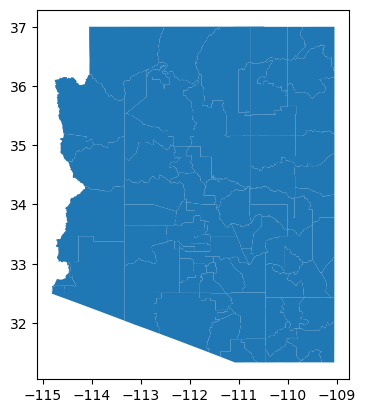

In [14]:
counties.plot()

In [15]:
counties.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,04,023,92295,01934961,0600000US0402392295,0402392295,Nogales,Nogales CCD,AZ,Santa Cruz County,Arizona,22,1762339489,2382710,"POLYGON ((-111.36692 31.52136, -111.33572 31.5..."
1,04,017,91632,01934949,0600000US0401791632,0401791632,Hopi,Hopi CCD,AZ,Navajo County,Arizona,22,4429144718,1975478,"POLYGON ((-110.75070 36.29843, -110.75070 36.2..."
2,04,003,90255,01934922,0600000US0400390255,0400390255,Benson,Benson CCD,AZ,Cochise County,Arizona,22,2386116644,1180899,"POLYGON ((-110.45229 31.81810, -110.45111 31.8..."
3,04,009,93111,01934978,0600000US0400993111,0400993111,San Carlos,San Carlos CCD,AZ,Graham County,Arizona,22,4363260475,30419755,"POLYGON ((-110.45719 33.29527, -110.45299 33.2..."
4,04,027,93978,01934995,0600000US0402793978,0402793978,Yuma,Yuma CCD,AZ,Yuma County,Arizona,22,637464990,12530444,"POLYGON ((-114.81418 32.56479, -114.81300 32.5..."


In [18]:
# Check the data type of the pigs dataframe 
print(type(counties))

# Check the data type of the geometry column
print(type(counties.geometry))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>


In [19]:
counties.dtypes

STATEFP         object
COUNTYFP        object
COUSUBFP        object
COUSUBNS        object
GEOIDFQ         object
GEOID           object
NAME            object
NAMELSAD        object
STUSPS          object
NAMELSADCO      object
STATE_NAME      object
LSAD            object
ALAND            int64
AWATER           int64
geometry      geometry
dtype: object

In [20]:
counties.geom_type

0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
       ...   
75    Polygon
76    Polygon
77    Polygon
78    Polygon
79    Polygon
Length: 80, dtype: object

In [21]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [22]:
counties.total_bounds

array([-114.81651 ,   31.332177, -109.045223,   37.00426 ])